In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os

EDA

In [2]:
#해당 파일 불러오기
data=pd.read_csv("StudentsPerformance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
#랜덤하게 확인하기! ->갯수 중심
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
28,male,group C,high school,standard,none,70,70,65
553,male,group D,some college,free/reduced,none,77,62,64
70,female,group D,some college,free/reduced,completed,58,63,73
157,male,group B,some college,free/reduced,none,60,60,60
203,female,group B,associate's degree,standard,none,57,69,68


In [7]:
#데이터 랜덤하게 확인하기 --> 비율중심:1000개의 10% : 100개
data.sample(frac=0.1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
466,female,group D,associate's degree,free/reduced,none,26,31,38
143,male,group A,high school,standard,none,57,43,47
3,male,group A,associate's degree,free/reduced,none,47,57,44
497,female,group D,some college,free/reduced,completed,59,78,76
154,male,group D,some high school,standard,none,62,67,61
...,...,...,...,...,...,...,...,...
764,male,group D,some college,standard,none,60,63,59
498,female,group B,some high school,standard,none,66,69,68
546,female,group A,some high school,standard,completed,92,100,97
887,male,group C,high school,free/reduced,none,54,72,59


In [8]:
#기본적인 수치정보를 확인하기 위하여 describe사용
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#각 컬럼의 type확인하기-> 물론 앞에서의 info도 있지만 dtype이라는 메소드 활용
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
#상관계수 측정
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [13]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [14]:
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [11]:
#빵구난 데이터가 있는지 확인하기
#m1)
data.isnull().values.any()#any->어디 하나라도 빈 데이터가 있나요?

False

In [12]:
#빵구난 데이터가 있는지 확인하기
#m2)->컬럼별로 확인하는 것
data.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
#총 몇개가 데이터가 없는지 확인
data.isnull().sum().sum()

0

In [16]:
data.rename(columns=({'gender':'Gender',
                      'race/ethnicity':'Race/Ethnicity',
                      'parental level of education':'Parental_Level_of_Education'
                    ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)
data.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')

In [18]:
data["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [19]:
data["Gender"].value_counts().index

Index(['female', 'male'], dtype='object')

In [21]:
data["Gender"].unique()

array(['female', 'male'], dtype=object)

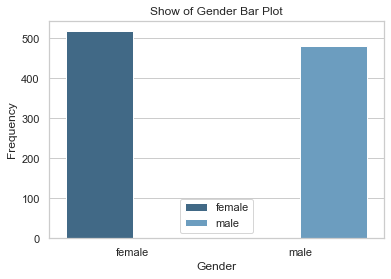

In [23]:
sns.set(style='whitegrid')

ax=sns.barplot(x=data['Gender'].value_counts().index, #["female","male"]
               y=data['Gender'].value_counts().values, #[300,700]
               palette="Blues_d",
               
               hue=['female','male'])

plt.legend(loc=8)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title('Show of Gender Bar Plot')
plt.show()

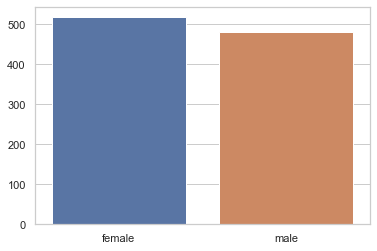

In [25]:
sns.barplot(x=data['Gender'].value_counts().index, y=data['Gender'].value_counts().values)

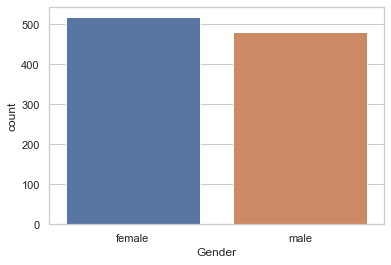

In [26]:
sns.countplot(data=data, x="Gender")

In [27]:
#인종구별로 barplot그려보기. 먼저 관련 데이터 살펴보기
data['Race/Ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64

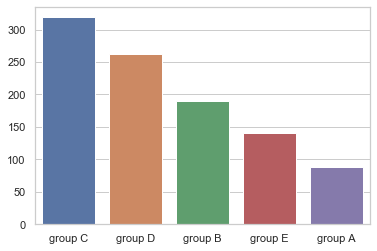

In [28]:
sns.barplot(x=data['Race/Ethnicity'].value_counts().index, y=data['Race/Ethnicity'].value_counts().values)

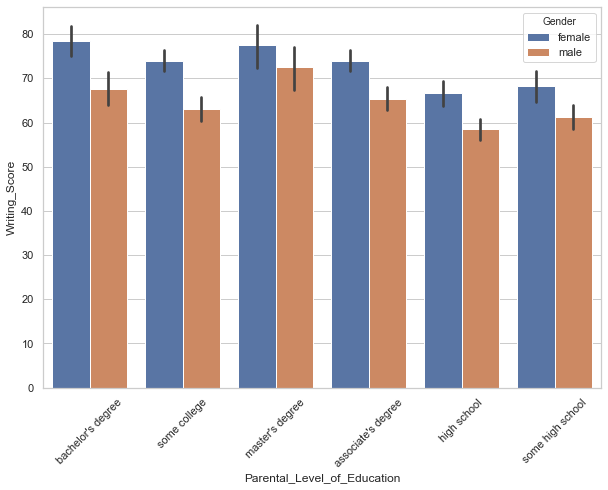

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(data=data, x='Parental_Level_of_Education', y='Writing_Score',hue="Gender")

plt.xticks(rotation=45)
plt.show()

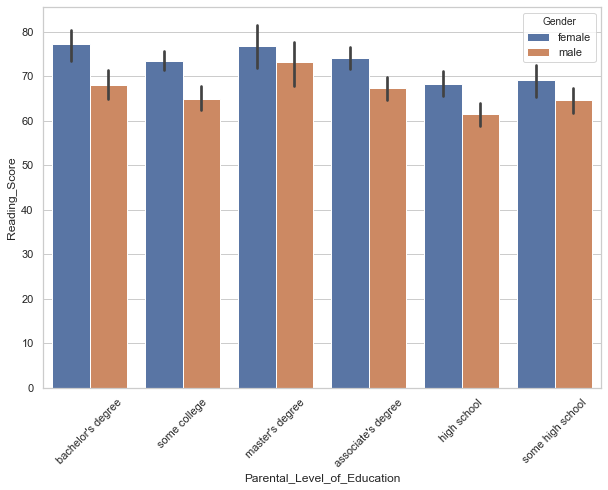

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(data=data, x='Parental_Level_of_Education', y='Reading_Score',hue="Gender")

plt.xticks(rotation=45)
plt.show()

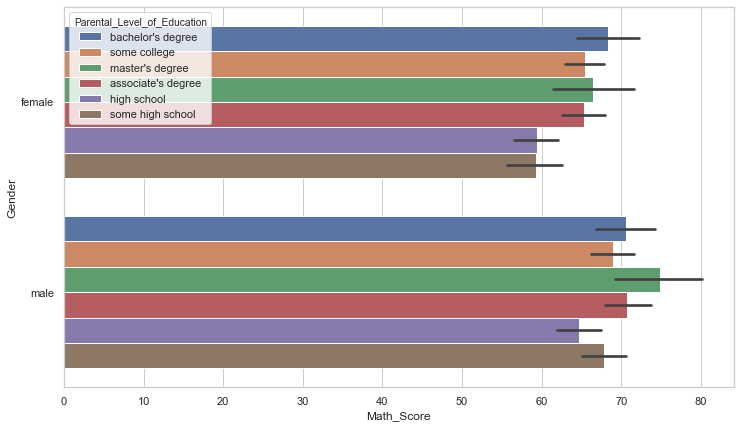

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='Math_Score', y='Gender', hue='Parental_Level_of_Education', data=data)

<Figure size 864x504 with 0 Axes>

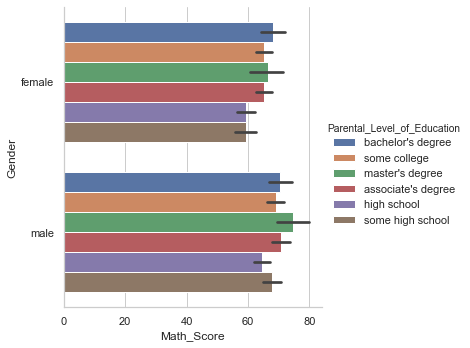

In [47]:
plt.figure(figsize=(12,7))
sns.catplot(x='Math_Score', y='Gender', hue='Parental_Level_of_Education', data=data, kind='bar')


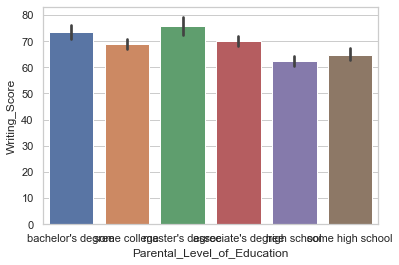

In [48]:
ax=sns.barplot("Parental_Level_of_Education","Writing_Score",data=data,
              linwidth=2.5,
              facecolor=())

* 조금 종합적으로 데이터를 처리해서 보려고 함.    
Test_Preparation_Course에서 이수한 사람들을 대상으로 한정을 하고,   
Lunch의 종류에 따라서 그룹을 지어서   
각기 그룹별로 작문성적의 평균을 구하고자 함.

In [50]:
# 01) 기본적인 Test_Preparation_Course 값들 확인
data['Test_Preparation_Course'].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

In [51]:
# 주어진 조건의 데이터 추리기..
data_lunch_score=data[data['Test_Preparation_Course']=="completed"].groupby(data['Lunch']).Writing_Score.mean()
data_lunch_score

Lunch
free/reduced    70.351145
standard        76.766520
Name: Writing_Score, dtype: float64

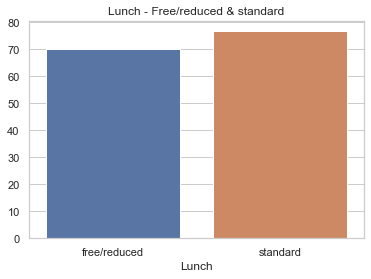

In [52]:
# 위의 사항을 그래프 그리기..
plt.title("Lunch - Free/reduced & standard")
sns.barplot(x=data_lunch_score.index,y=data_lunch_score.values)
plt.show()

barplot를 겹쳐서 나타내기                
Gender와 Race/Ethicity의 barplot에 대한 count를 하나의 그래프로 나타내기...

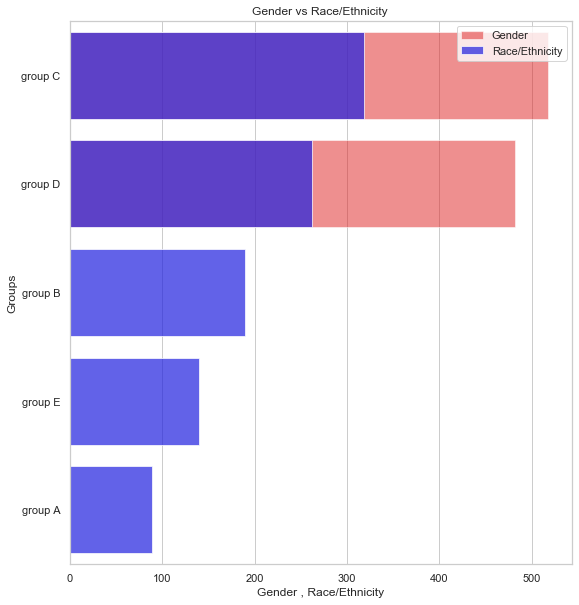

In [53]:
_,ax=plt.subplots(figsize=(9,10))
sns.barplot(x=data['Gender'].value_counts().values,y=data['Gender'].value_counts().index,alpha=0.5,color='red',label='Gender')
sns.barplot(x=data['Race/Ethnicity'].value_counts().values,y=data['Race/Ethnicity'].value_counts().index,color='blue',alpha=0.7,label='Race/Ethnicity')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='Gender , Race/Ethnicity',ylabel='Groups',title="Gender vs Race/Ethnicity ")
plt.show()

<p id='6'><h3><b>Point Plot : 점찍기...점과 점을 이을까 말까?</b></h3></p>
<p>seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)</p>

<ul>
    <li>x, y, hue : names of variables in data or vector data, optional</li>
    <li>data : DataFrame, array, or list of arrays, optional</li>
    <li>order, hue_order : lists of strings, optional</li>
    <li>markers : string or list of strings, optional</li>
    <li>linestyles : string or list of strings, optional</li>
    <li>color : matplotlib color, optional</li>
    <li>palette : palette name, list, or dict, optional</li>
    <li>ax : matplotlib Axes, optional</li>
</ul>



* x : Race/Ethnicity의 값이 group B인 데이터 중에서 수학성적에 따라서 y는 몇 개의 데이터가 있는지....
그리고 이것에 대해서 reading 성적도 같이 나타내기!!!

In [54]:
# 기본적인 인종 관련 데이터 종류 확인.
data['Race/Ethnicity'].unique()


array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [55]:
# 전체 1000건 중에서 몇 건의 데이터가 해당 조건에 속하는지 확인...
x_cnt = len(data[(data['Race/Ethnicity']=='group B')].Math_Score)
x_cnt

190

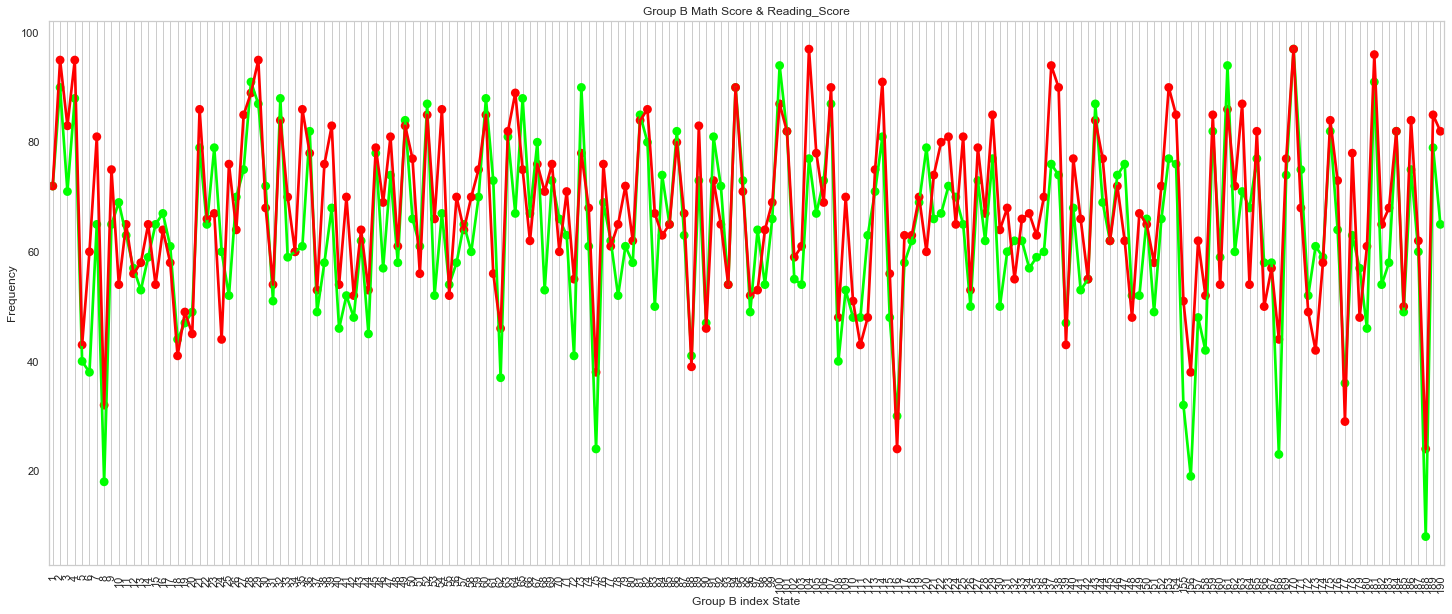

In [56]:
#기본 설정
f,ax1=plt.subplots(figsize=(25,10))

# 그래프1
sns.pointplot(x=np.arange(1,x_cnt+1),
              y=data[(data['Race/Ethnicity']=='group B')].Math_Score,
              color='lime',alpha=0.8)
# 그래프2
sns.pointplot(x=np.arange(1,x_cnt+1),
              y=data[(data['Race/Ethnicity']=='group B')].Reading_Score,
              color='red',
              alpha=0.5)

# 기타 옵션...
#sns.pointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Math Score & Reading_Score')
plt.xticks(rotation=90)
plt.grid()
plt.show()

* 가로 : 리딩성적에 따른, 세로 : 수학 성적에 분포를 보고 싶음   
단, 성별에 따라서..

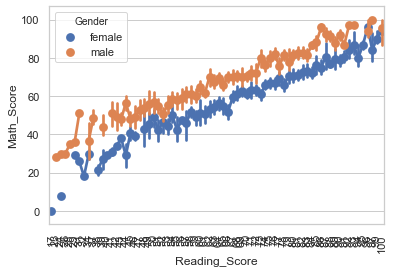

In [57]:
plt.figure()

ax = sns.pointplot(x="Reading_Score",
                   y="Math_Score", 
                   hue="Gender"
                   ,data=data)
plt.xticks(rotation=90)
plt.show()

* 가로 : 리딩성적에 따른, 세로 : 작문 성적에 분포를 보고 싶음   
단, 성별에 따라서..

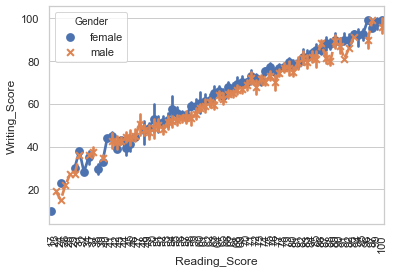

In [58]:
ax = sns.pointplot(x="Reading_Score", 
                   y="Writing_Score", 
                   hue="Gender",
                   data=data,
                   markers=["o", "x"],
                   linestyles=["-", "--"])

plt.xticks(rotation=90)
plt.show()

<p id='7'><h3><b>Joint Plot : 2차원으로 보고자 할 때..주로</b></h3></p>
<p>seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)</p>

<ul>
    <li>x, y : strings or vectors</li>
    <li>data : DataFrame, optional</li>
    <li>kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional</li>
    <li>color : matplotlib color, optional</li>
    <li>dropna : bool, optional</li>
</ul>

* 위에서 한 것과 유사하게 인종이 group B인 데이터에 대해서, 각기 순서대로 수학 성적을 분포를 점을 찍고, 양쪽에는 각기 분포를 같이 보고자 할 때..

<Figure size 720x720 with 0 Axes>

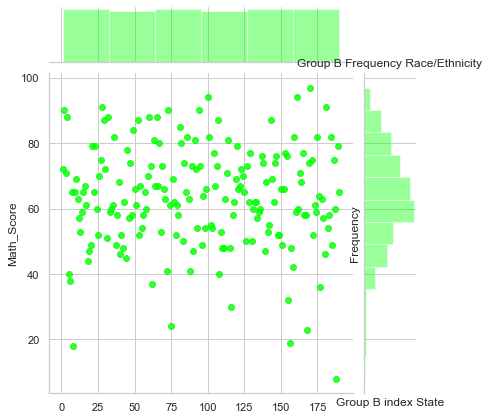

In [59]:
plt.figure(figsize=(10,10))

# 기본 데이터 설정
sns.jointplot(x=np.arange(1,x_cnt+1),
              y=data[(data['Race/Ethnicity']=='group B')].Math_Score,
              color='lime',
              alpha=0.8)
# 부가 옵션
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

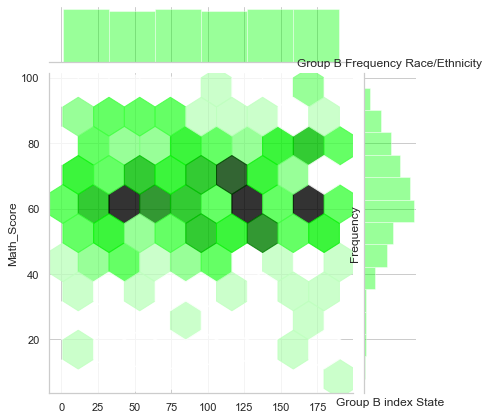

In [60]:
# 위의 그래프인데, 다른 양식으로 표현...
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,x_cnt+1),
              y=data[(data['Race/Ethnicity']=='group B')].Math_Score,
              color='lime',
              kind='hex',
              alpha=0.8)
# 부가적인 옵션
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

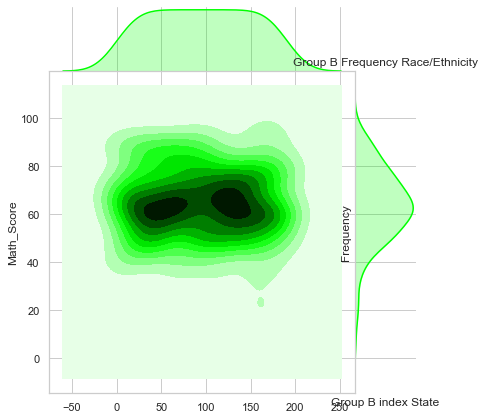

In [61]:
# 위의 그래프인데, 다른 양식으로 표현...
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,x_cnt+1),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,
              color='lime',
              space=0,
              kind='kde')

plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

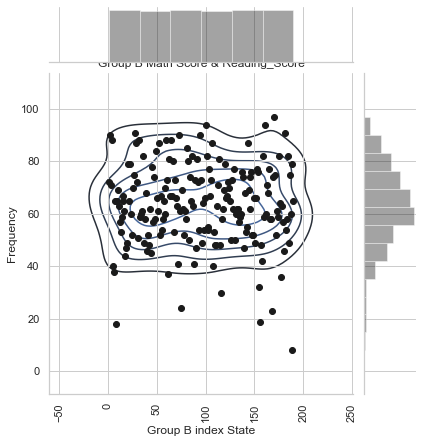

In [62]:
# 다른 양식..여러개를 다시 중첩하여서!!!!
plt.figure(figsize=(10,10))

# 여기 부분에 대해서 주의해서 볼 것!!!!!그래프 중첩해서 그리기!!!!
sns.jointplot(x=np.arange(1,x_cnt+1),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='k').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Math Score & Reading_Score')
plt.xticks(rotation=90)
plt.show()

 <p id='8'><h3><b>Pie Chart</b></h3></p>

* 인종 그룹별로, 비율 파이 그래프 그리기

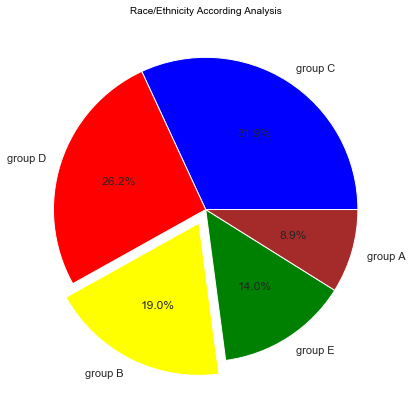

In [63]:
labels=data['Race/Ethnicity'].value_counts().index
colors=['blue','red','yellow','green','brown']
# 위의 특정 부분에 대한 간격으로 튀어나온 부분 표시..
explode=[0,0,0.1,0,0]
values=data['Race/Ethnicity'].value_counts().values

#그리기
plt.figure(figsize=(7,7))
plt.pie(values,
        explode=explode,
        labels=labels
        ,colors=colors,
        autopct='%1.1f%%') # 숫자 표현 양식
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()


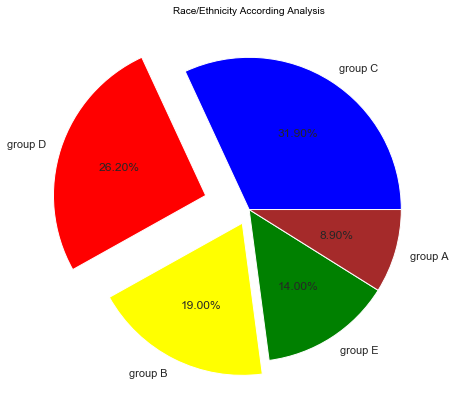

In [64]:
labels=data['Race/Ethnicity'].value_counts().index
colors=['blue','red','yellow','green','brown']
# 위의 특정 부분에 대한 간격으로 튀어나온 부분 표시..
explode=[0,0.3,0.1,0,0]
values=data['Race/Ethnicity'].value_counts().values

#그리기
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.2f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

수학/독해/작문의 성적들의 평균에 대해서 표기하기..


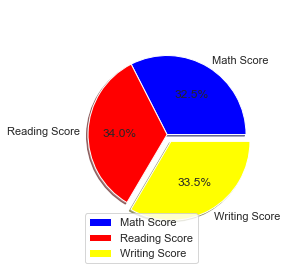

In [65]:
plt.figure(figsize=(4,4))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=[data.Math_Score.mean(),
        data.Reading_Score.mean(),
        data.Writing_Score.mean()]

plt.pie(values,
        labels=labels,
        colors=colors
        ,explode=explode,
        autopct='%1.1f%%',
        shadow=True)

plt.legend(['Math Score', 'Reading Score', 'Writing Score'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

* 인종그룹별로 리딩성적의 평균에 대한 파이그래프

In [66]:
data.groupby('Race/Ethnicity')['Reading_Score'].mean()

Race/Ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: Reading_Score, dtype: float64

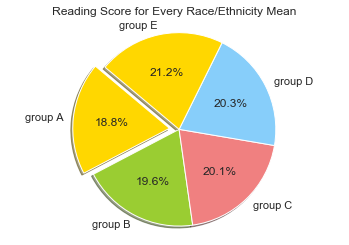

In [67]:
# Data to plot
labels = 'group A', 'group B', 'group C', 'group D','group E'
sizes = data.groupby('Race/Ethnicity')['Reading_Score'].mean().values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors,
    autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
plt.title('Reading Score for Every Race/Ethnicity Mean')
plt.axis('equal')
plt.show()

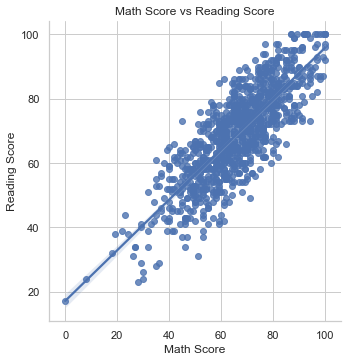

In [68]:
sns.lmplot(x='Math_Score',
           y='Reading_Score',
           data=data)

plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs Reading Score')
plt.show()

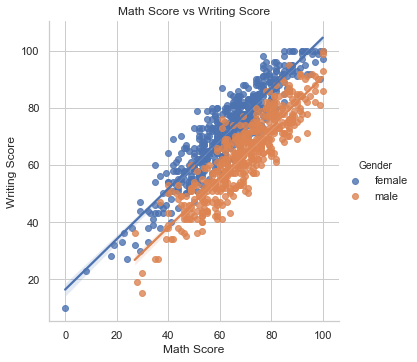

In [69]:
sns.lmplot(x='Math_Score'
           ,y='Writing_Score',
           hue='Gender',
           data=data)


plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

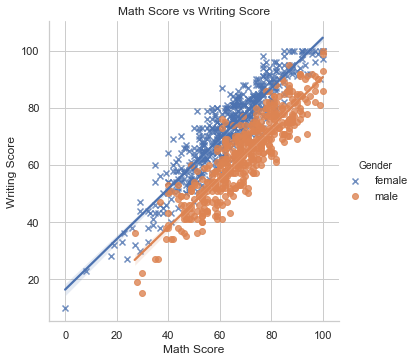

In [70]:
sns.lmplot(x='Math_Score',
           y='Writing_Score',
           hue='Gender',
           data=data,
           markers=['x','o'])

plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

 <p id='10'><h3><b>Kde Plot : 히스토그램보다는 추정을 통하여 중간값들을 생성하여 부드럽게 이어지게 표현</b></h3></p>
 <p>seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)</p>
 <ul>
     <li>data : 1d array-like</li>
     <li>data2: 1d array-like, optional</li>
     <li>shade : bool, optional</li>
     <li>vertical : bool, optional</li>
     <li>kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }, optional</li>
     <li>cut : scalar, optional</li>
     <li>legend : bool, optional</li>
     <li>ax : matplotlib axes, optional</li>
 </ul>

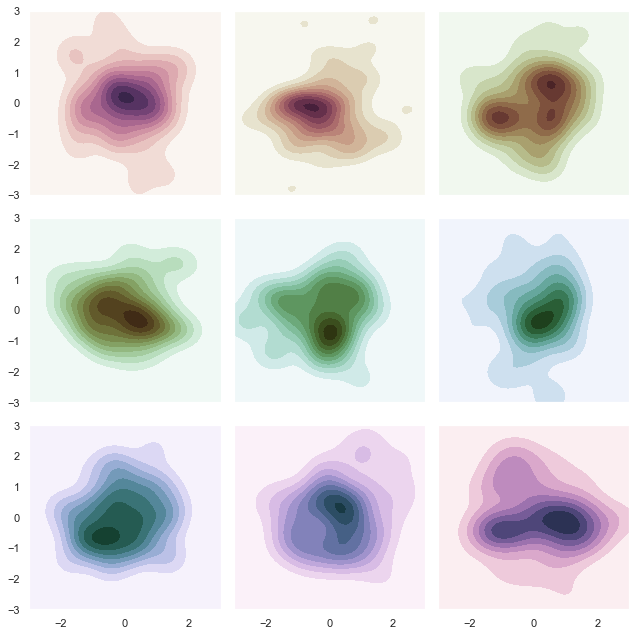

In [71]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()
plt.show()

<p id='11'><h3><b>Violin Plot</b></h3></p>
<p>seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)</p>

<ul>
    <li>x, y, hue : names of variables in data or vector data, optional</li>
    <li>data : DataFrame, array, or list of arrays, optional</li>
    <li>scale : {“area”, “count”, “width”}, optional</li>
    <li>linewidth : float, optional</li>
    <li>color : matplotlib color, optional</li>
    <li>palette : palette name, list, or dict, optional</li>
    <li>ax : matplotlib Axes, optional</li>
    <li>saturation : float, optional</li>
</ul>

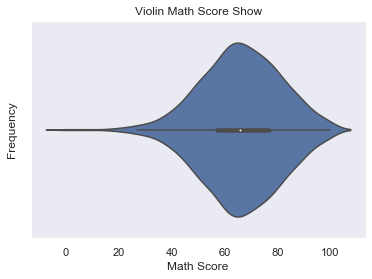

In [72]:
sns.violinplot(data['Math_Score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Violin Math Score Show')
plt.show()

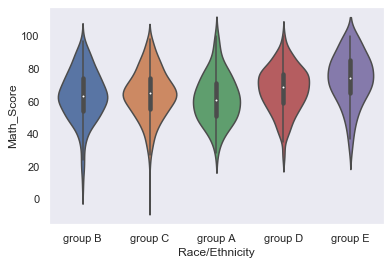

In [73]:
sns.violinplot(x=data['Race/Ethnicity'],y=data['Math_Score'])
plt.show()

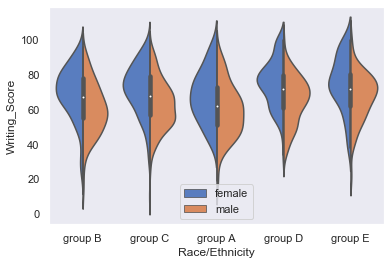

In [74]:
sns.violinplot(data['Race/Ethnicity'],data['Writing_Score'],
               hue=data['Gender'],palette='muted',split=True)
plt.legend(loc=8)
plt.show()